<a href="https://colab.research.google.com/github/zhangxs131/Transformers_example/blob/main/vision_data_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#数据处理

*      文本数据
*      图片数据
*      音频数据

In [1]:
!pip install transformers datasets

     |████████████████████████████████| 3.5 MB 13.3 MB/s 
     |████████████████████████████████| 311 kB 49.9 MB/s 
     |████████████████████████████████| 6.8 MB 43.0 MB/s 
     |████████████████████████████████| 895 kB 66.6 MB/s 
     |████████████████████████████████| 596 kB 38.7 MB/s 
     |████████████████████████████████| 67 kB 4.0 MB/s 
     |████████████████████████████████| 1.1 MB 49.9 MB/s 
     |████████████████████████████████| 212 kB 51.2 MB/s 
     |████████████████████████████████| 134 kB 54.6 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 144 kB 56.0 MB/s 
     |████████████████████████████████| 271 kB 53.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Using custom data configuration default
Reusing dataset food101 (/root/.cache/huggingface/datasets/food101/default/0.0.0/7cebe41a80fb2da3f08fcbef769c8874073a86346f7fb96dc0847d4dfc318295)


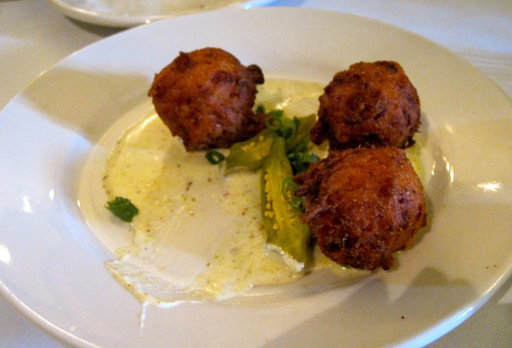

In [16]:
#vision,我就想要一张图片，为啥全给我下下来呢，无语。

from datasets import load_dataset

vision_dataset=load_dataset('food101',split='train[:100]')

vision_dataset[3]['image']

这数据集food101还不错，都是吃的，哈哈

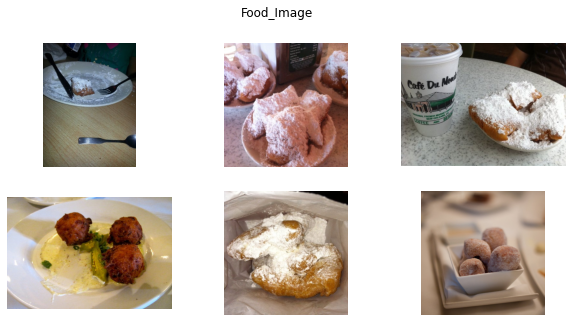

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

dataset=[i for i in vision_dataset]

plt.figure(figsize=(10,5))
plt.suptitle('Food_Image')
for id,i in enumerate(dataset[:6]):
  plt.subplot(2,3,id+1)
  plt.imshow(i['image'])
  plt.axis('off')

plt.show()

Downloading:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


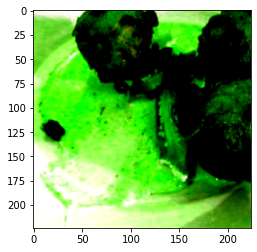

In [19]:
#特征提取
from transformers import AutoFeatureExtractor
from torchvision.transforms import Compose,Normalize,RandomResizedCrop,ColorJitter,ToTensor

extractor=AutoFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

normalize=Normalize(mean=extractor.image_mean,std=extractor.image_std)
_transforms=Compose(
    [RandomResizedCrop(extractor.size),ColorJitter(brightness=0.5,hue=0.5),ToTensor(),normalize]
)

def transforms(examples):
  examples['pixel_values']=[_transforms(image.convert('RGB')) for image in examples['image']]
  return examples

vision_dataset.set_transform(transforms)

img=vision_dataset[3]['pixel_values']
plt.imshow(img.permute(1,2,0))
plt.show()